# 1) Import packages and loading data

In [1]:
# import packages
import pandas as pd
import re
import os
import nltk
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# check working directory
os.getcwd()

'C:\\Users\\gianl\\Capstone2\\Jup_notebook'

In [3]:
df_True= pd.read_csv('C:\\Users\\gianl\\Capstone2\\data\True.csv')
df_False= pd.read_csv('C:\\Users\\gianl\\Capstone2\\data\Fake.csv')

In [4]:
# Assigning 0/1 to Real/Fake 
df_True['Real_Fake'] = 0
df_False['Real_Fake'] = 1

In [5]:
### Checking real news dataframe
print(df_True.head())
print(df_True.shape)

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  Real_Fake  
0  December 31, 2017           0  
1  December 29, 2017           0  
2  December 31, 2017           0  
3  December 30, 2017           0  
4  December 29, 2017           0  
(21417, 5)


In [6]:
### Checking fake news dataframe
print(df_False.head())
print(df_False.shape)

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  Real_Fake  
0  December 31, 2017          1  
1  December 31, 2017          1  
2  December 30, 2017          1  
3  December 29, 2017          1  
4  December 25, 2017          1  
(23481, 5)


### Merging Real and Fake news dataframes

In [7]:
df= pd.concat([df_True, df_False], ignore_index = True)
print(df.head(5))
print(df.shape)
print(df.index)

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  Real_Fake  
0  December 31, 2017           0  
1  December 29, 2017           0  
2  December 31, 2017           0  
3  December 30, 2017           0  
4  December 29, 2017           0  
(44898, 5)
RangeIndex(start=0, s

# 2) Cleaning

### Removing white spaces at the end and beginning

In [8]:
print(df['text'].str.startswith(' ').sum())
print(df['text'].str.endswith(' ').sum())
print(df['title'].str.startswith(' ').sum())
print(df['title'].str.endswith(' ').sum())

1784
26693
9045
65


In [9]:
#stripping white spaces at the beginning and end
df['text'] = df['text'].str.strip()
df['title'] = df['title'].str.strip()

print(df['text'].str.startswith(' ').sum())
print(df['text'].str.endswith(' ').sum())
print(df['title'].str.startswith(' ').sum())
print(df['title'].str.endswith(' ').sum())

0
0
0
0


### Converting date into datetime datatype. Then removal of row with NaT 

In [10]:
# converting date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# checking for NaT on date column
print(df['date'].isna().sum())

10


In [11]:
# checking these NaT rows
df[df['date'].isna()]

,title,text,subject,date,Real_Fake
30775,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,NaT,1
36924,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,NaT,1
36925,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,NaT,1
37256,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,1
37257,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,1
38849,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,1
38850,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,1
40350,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,NaT,1
43286,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,1
43287,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,1


In [12]:
# Those rows are useless. let's remove them
df_t = df.dropna()

In [13]:
print(df_t.shape)
assert df_t['date'].notnull().all()

(44888, 5)


### Remove news with text shorter than 8 characters 

In [14]:
# All the news with text shorter than 8 characters (which is equal to 1-2 words) were removed
df_t2 = df_t[df_t['text'].str.len() >8]
print(df_t2.shape)

(44236, 5)


### Drop full duplicated rows

In [15]:
print(df_t2.duplicated().sum())
df_t2 = df_t2.drop_duplicates()
print(df_t2.duplicated().sum())
print('shape of dateframe is', df_t.shape)

211
0
shape of dateframe is (44888, 5)


## Duplicates for categories, title and text

In [16]:
# Check for duplicates in title and text
print('Duplicates on title column are', df_t2['title'].duplicated().sum())
print('Duplicates on text column are', df_t2['text'].duplicated().sum())

Duplicates on title column are 5762
Duplicates on text column are 5400


#### Let's dig dipper in what is duplicated:

In [17]:
# there more duplicates on text and title...
print(df_t2[(df_t2['title'].duplicated() == True) & (df_t2['text'].duplicated() == True)].shape) 
print(df_t2[(df_t2['title'].duplicated() == False) & (df_t2['text'].duplicated() == True)].shape)
print(df_t2[(df_t2['title'].duplicated() == True) & (df_t2['text'].duplicated() == False)].shape)
print(df_t2[(df_t2['title'].duplicated() == False) & (df_t2['text'].duplicated() == False)].shape)

(5387, 5)
(13, 5)
(375, 5)
(38250, 5)


# Best course of action: create dummy, group by 'text' and aggregate

### Get dummies variable for subject / delete subject colum 

In [18]:
df_t2 = pd.concat([df_t2, pd.get_dummies(df_t2['subject'], prefix ='Cat')], axis = 1)
del df_t2['subject']

In [19]:
print(df_t2.shape)
print(df_t2.head())

(44025, 12)
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       date  Real_Fake  \
0  WASHINGTON (Reuters) - The head of a conservat... 2017-12-31          0   
1  WASHINGTON (Reuters) - Transgender people will... 2017-12-29          0   
2  WASHINGTON (Reuters) - The special counsel inv... 2017-12-31          0   
3  WASHINGTON (Reuters) - Trump campaign adviser ... 2017-12-30          0   
4  SEATTLE/WASHINGTON (Reuters) - President Donal... 2017-12-29          0   

   Cat_Government News  Cat_Middle-east  Cat_News  Cat_US_News  Cat_left-news  \
0                    0                0         0            0              0   
1                   

In [20]:
final_df = df_t2.groupby('text').agg({'title': 'first', 'date':'first', 'Real_Fake': 'max', 'Cat_Government News' : 'max', 'Cat_Middle-east': 'max' , 'Cat_News': 'max', 'Cat_US_News': 'max', 'Cat_left-news': 'max', 'Cat_politics': 'max', 'Cat_politicsNews': 'max', 'Cat_worldnews': 'max'})

In [21]:
pd.set_option('display.max_columns', None)
print(final_df.shape)
final_df.head(5)

(38625, 11)


,title,date,Real_Fake,Cat_Government News,Cat_Middle-east,Cat_News,Cat_US_News,Cat_left-news,Cat_politics,Cat_politicsNews,Cat_worldnews
text,,,,,,,,,,,
"""Fake news"" was born in August 2014 in Ferguson MO. when @MSNBC @nytimes @washingtonpost @CNN all propagated the Hands up, Don't shoot lie. pic.twitter.com/O2cjpm63GQ David A. Clarke, Jr. (@SheriffClarke) December 6, 2016On Thursday Sheriff Clarke went off on liberal lawyer Eric Guster on Hannity over the Hands up, Don t Shoot lie. Clarke slammed the lawyer for pushing lies that have resulted in the deaths of police officers across the country.After Guster defended the Hands Up, Don t Shoot movement Sheriff Clarke went off. GP",SHERIFF CLARKE BLASTS Liberal Crybaby Lawyer: ...,2016-12-09,1,0,0,0,0,1,1,0,0
"#BREAKING @RealBenCarson on #foxreport: If after meeting and they (Trump Transition Team) decide they want me, then I wouldn't turn it down HARRISFAULKNER (@HARRISFAULKNER) November 21, 2016 I didn t 100% say that I would never serve. I just said that my preference would be to stay outside. Basically I ve said, my preference was to be outside, and to act as an advisor. But if after going through the process, they all conclude that, you now, that it would be much better to have me in the cabinet, I would have to give that some serious consideration. It s just not my preference. Watch here at the 1:20 mark:https://youtu.be/-zuSHm0ASNc",BREAKING: BEN CARSON Makes Surprising Announce...,2016-11-20,1,0,0,0,0,0,1,0,0
"#FeelTheBern of incompetence A survivor of the 2012 Benghazi siege that claimed the lives of four Americans and subject of the movie 13 Hours repudiated Hillary Clinton Thursday night in Connecticut s largest Democratic stronghold.Kris Tanto Paronto, a military contractor and former Army Ranger, said Clinton failed as secretary of state to send in adequate reinforcements when the U.S. mission in Libya was under terrorist attack.Part of the security team that tried to defend the compound, Paronto headlined the annual Lincoln Day fundraising dinner of Bridgeport Republicans, who make up less than 10 percent of the city s electorate.Paronto stopped short of endorsing the GOP s presumptive presidential nominee, Donald Trump, but said he will work with Republicans to shine a light on what happened in the confusion of the attack that killed U.S. ambassador to Libya J. Christopher Stevens on Sept. 11, 2012. I don t think she has a soul, Paronto said of Clinton during an interview with Hearst Connecticut Media. I hope it haunts her. I don t think it will. A spokesman for Clinton, who campaigned in Bridgeport ahead of her primary victory last month in Connecticut, declined to comment.Paronto said he has no doubt that there is a nexus between the Benghazi attack and the email scandal that has dogged Clinton, who has been criticized for using a personal server to send and receive classified material when she was secretary of state. He repeated accusations that Clinton misled the victims families over what incited the attack. She lied to the family members, period, Paronto said. People are believing her over the family members of teammates that I lost. Clinton has denied telling the victims families that an anti-Islam video was to blame for sparking the attack.Andy Wainwright, a Republican State Central Committee member from Stamford, said he recently saw 13 Hours and was mesmerized. It was not a political movie, he said. There was no finger-pointing. It highlights the bureaucracy and a lot of times the military being handcuffed. For entire story: CT Post",Benghazi Survivor On Hillary Clinton: “I Don’t...,2016-05-31,1,0,0,0,0,0,1,0,0
"#FeelTheBernOfSocialismUnivision host Leon Krauze asked avowed Socialist Bernie Sanders about the collapse of several Latin American countries due to their failed socialist policies. Angry Bernie responded with well, anger.WATCH:",ANGRY BERNIE REFUSES To Respond When TV Host A...,2016-05-27,1,0,0,0,0,1,1,0,0
"#FlashbackFriday 1993 #AttorneyGate 

In [22]:
# reset index
final_df = final_df.reset_index(drop = False)
final_df2 = final_df.set_index('date').sort_index()

In [23]:
final_df2.head(3)

,text,title,Real_Fake,Cat_Government News,Cat_Middle-east,Cat_News,Cat_US_News,Cat_left-news,Cat_politics,Cat_politicsNews,Cat_worldnews
date,,,,,,,,,,,
2015-03-31,The irony here isn t lost on us. Hillary is be...,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,1,0,0,0,0,1,1,0,0
2015-03-31,"In case you missed it Sen. Harry Reid (R-NV), ...",WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,1,0,0,0,0,1,1,0,0
2015-03-31,Nothing like political cronyism to make your s...,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,1,0,0,0,0,0,1,0,0


# News cleaning

### A) Removal of cross site scripting: from // < to gt;

In [24]:
# Example below
print(final_df2.iloc[5789, 0])

Children are proof that hate is taught and learned. We are not born with prejudice. It is our upbringings that make us hate those unlike ourselves. Case in point   a 7-year-old boy and his little sister, who is 5, who are protesting North Carolina s sweeping anti-LGBT legislation, because their best friend, who is transgender, is being directly affected by it. The children s story was so inspiring that it was picked up by the popular Facebook page  Have a Gay Day. // < ![CDATA[ // < ![CDATA[ // < ![CDATA[ (function(d, s, id) { var js, fjs = d.getElementsByTagName(s)[0]; if (d.getElementById(id)) return; js = d.createElement(s); js.id = id; js.src = "//connect.facebook.net/en_US/sdk.js#xfbml=1&#038;version=v2.3"; fjs.parentNode.insertBefore(js, fjs);}(document, 'script', 'facebook-jssdk')); // ]]&gt;This.Posted by Have A Gay Day on Tuesday, April 5, 2016Their mother, Janna Harris Cadenas, is very proud of her children. She posted to the  Have a Gay Day  Facebook page:Now that I went thr

In [25]:
# They start with  // < and end with &gt;
# I used the non-greedy search/substitution of the text to avoid the removal of most of the text in those texts with more than one (// <  -  &gt;) pair
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub(r"// <.*?&gt;", '.', x))
# check  the same text
print(final_df2.iloc[5789, 0])

Children are proof that hate is taught and learned. We are not born with prejudice. It is our upbringings that make us hate those unlike ourselves. Case in point   a 7-year-old boy and his little sister, who is 5, who are protesting North Carolina s sweeping anti-LGBT legislation, because their best friend, who is transgender, is being directly affected by it. The children s story was so inspiring that it was picked up by the popular Facebook page  Have a Gay Day. .This.Posted by Have A Gay Day on Tuesday, April 5, 2016Their mother, Janna Harris Cadenas, is very proud of her children. She posted to the  Have a Gay Day  Facebook page:Now that I went through all the posts  This is my son in the picture. His name is McCartney, he is 7 years old. He asked me to take him to this rally because his best friend is Transgender and for her privacy and age, she was not able to attend. My son is a beautiful, kind and intelligent soul. He was fully aware of why he was there this day and not only di

### B) Removal of cross site scripting: from &lt to &gt;

In [26]:
# Example below
print(final_df2.iloc[3245, 0])

Some companies definitely prefer increased profit over principle and, clearly, patriotism. Yet another U.S. company, this time Carrier, decided that they would be relocating their Indianapolis, IN, plant to Monterrey, Mexico. This relocation will, in turn, put 2,100 people out of work come 2017.The company, of course, in a state-run by a supposed business friendly Republican, Gov. Mike Pence, is blaming regulations and the high cost to run business here at home. In a statement put out by HVAC Systems and Services North America president Chris Nelson: This move is intended to address the challenges we continue to face in a rapidly changing HVAC industry, with the continued migration of the HVAC industry to Mexico, including our suppliers and competitors, and ongoing cost and pricing pressures driven, in part, by new regulatory requirements, Relocating our operations to a region where we have existing infrastructure and a strong supplier base will allow us to operate more cost effectivel

In [27]:
# They start with &lt and end with &gt;
# I used the greedy search/substitution of the text
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub(r'&lt.+&gt;', '.', x))
# check  the same new's body
print(final_df2.iloc[3245, 0])

Some companies definitely prefer increased profit over principle and, clearly, patriotism. Yet another U.S. company, this time Carrier, decided that they would be relocating their Indianapolis, IN, plant to Monterrey, Mexico. This relocation will, in turn, put 2,100 people out of work come 2017.The company, of course, in a state-run by a supposed business friendly Republican, Gov. Mike Pence, is blaming regulations and the high cost to run business here at home. In a statement put out by HVAC Systems and Services North America president Chris Nelson: This move is intended to address the challenges we continue to face in a rapidly changing HVAC industry, with the continued migration of the HVAC industry to Mexico, including our suppliers and competitors, and ongoing cost and pricing pressures driven, in part, by new regulatory requirements, Relocating our operations to a region where we have existing infrastructure and a strong supplier base will allow us to operate more cost effectivel

### C) Removal of cross site scripting: from .</ < to &gt

In [28]:
# Example below
print(final_df2.iloc[2512, 0])

Donald Rumsfeld is in full damage control mode after a declassified memo from 2002 making the rounds revealed that he lied about Iraq s  WMDs.  Like anyone desperate to sway public opinion and keep himself out of jail, Rumsfeld is giving interviews to tell  his side.  Why he decided to go The Late Show with Stephen Colbert is unclear. Colbert is a screaming liberal, very smart and very well-informed. Perhaps Rumsfeld thought he could outmaneuver the comedian? Maybe he thought Colbert would go easy on him? Maybe Rumsfeld is suffering from dementia?Needless to say, the interview did not go well for Rumsfeld:The talk show host said this showed Bush administration officials believed there were weapons of mass destruction   but they had no hard evidence of their existence. I believe that sincerely   I don t think anybody made up the belief that there were weapons of mass destruction,  Colbert said, as Rumsfeld insisted those beliefs were sincere.  That is cynicism beyond what I would ever w

In [29]:
# They start with .< and end with &gt;
# I used the greedy search/substitution of the text
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub(r'\.\<.+&gt;', '.', x))
# check  the same new's body
print(final_df2.iloc[2512, 0])

Donald Rumsfeld is in full damage control mode after a declassified memo from 2002 making the rounds revealed that he lied about Iraq s  WMDs.  Like anyone desperate to sway public opinion and keep himself out of jail, Rumsfeld is giving interviews to tell  his side.  Why he decided to go The Late Show with Stephen Colbert is unclear. Colbert is a screaming liberal, very smart and very well-informed. Perhaps Rumsfeld thought he could outmaneuver the comedian? Maybe he thought Colbert would go easy on him? Maybe Rumsfeld is suffering from dementia?Needless to say, the interview did not go well for Rumsfeld:The talk show host said this showed Bush administration officials believed there were weapons of mass destruction   but they had no hard evidence of their existence. I believe that sincerely   I don t think anybody made up the belief that there were weapons of mass destruction,  Colbert said, as Rumsfeld insisted those beliefs were sincere.  That is cynicism beyond what I would ever w

### D) Removal of cross site scripting: from // to ]]>, non-greedy

In [30]:
# Example below
print(final_df2.iloc[133, 0])

High school kids out of control? Noooo! We ve been reporting of the huge groups of high school kids getting violent at malls and other places in towns across America. Basically they re organized riots There were reports of an organized riot, called  a purge,  to be carried out by students from three Baltimore high schools in the name of Freddie Gray and unrest over police brutality.// <![CDATA[ var p = new anv_pl_def(); p.config = {}; p.config.width = 640; p.config.height = 360; p.loadVideoExpressV3('eyJ1cGxvYWRfaWQiOiJleHByZXNzLTE0MzAxNjg0ODc4OTQiLCJ2aWRlb190eXBlIjoiMSIsInNyY19pbWFnZV91cmwiOiJodHRwOi8vbWVkaWEyLmFiYzJuZXdzLmNvbS9waG90by8yMDE1LzA0LzI3LzE2eDkvTW9yZV92aW9sZW5jZV9pbl90aGVfc3RyZWV0c19vZl9CYWx0aW1vcl8yODc0NTgwMDAxXzE3NDE3Nzc0X3ZlcjEuMF82NDBfNDgwLmpwZyIsImRlZl90aXRsZSI6Ik1vcmUgdmlvbGVuY2UgaW4gdGhlIHN0cmVldHMgb2YgQmFsdGltb3JlIGJ5IE1vbmRhd21pbiBNYWxsIiwidGl0bGUiOiJNb3JlIHZpb2xlbmNlIGluIHRoZSBzdHJlZXRzIG9mIEJhbHRpbW9yZSBieSBNb25kYXdtaW4gTWFsbCIsImRlZl9kZWNzcmlwdGlvbiI6IiIsInB1Ym

In [31]:
# They start with // and end with ]]>
# I used the greedy search/substitution of the text
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('// \<.*?]]>', '.', x))
# check  the same text
print(final_df2.iloc[133, 0])

High school kids out of control? Noooo! We ve been reporting of the huge groups of high school kids getting violent at malls and other places in towns across America. Basically they re organized riots There were reports of an organized riot, called  a purge,  to be carried out by students from three Baltimore high schools in the name of Freddie Gray and unrest over police brutality..At least seven police officers were injured. At least one police officer suffered a broken bone. Another officer was knocked unconscious.Read more: abc2news


### E) Removal of cross site scripting: from < to >, non-greedy

In [32]:
# Example below
print(final_df2.iloc[8106, 0])

(Reuters) - Republican Donald Trump trails Democrat Hillary Clinton by 10 points in the 2016 presidential campaign, according to a poll released on Tuesday, showing little change from a week ago and suggesting his comments about a Mexican-American judge had yet to affect his standing in the race. The latest Reuters/Ipsos poll came after several days in which Trump faced sharp criticism over his insistence that a federal judge who was born in Indiana to Mexican parents was biased in a case involving the celebrity billionaire. But the fallout from Trump’s comments appeared to have done little to help Clinton build her lead over the presumptive Republican nominee.   The online survey showed that 44.3 percent of likely voters said they would vote for Clinton, compared with 34.7 percent who would support Trump. A further 20.9 percent said they would not vote for either candidate. The results were little changed from last week’s survey. The poll was conducted from Friday to Tuesday, starting

In [33]:
# They start with < and end with >
# getting rid of < .....> 
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('<.*?>', ' ',x))
# check  the same text
print(final_df2.iloc[8106, 0])

(Reuters) - Republican Donald Trump trails Democrat Hillary Clinton by 10 points in the 2016 presidential campaign, according to a poll released on Tuesday, showing little change from a week ago and suggesting his comments about a Mexican-American judge had yet to affect his standing in the race. The latest Reuters/Ipsos poll came after several days in which Trump faced sharp criticism over his insistence that a federal judge who was born in Indiana to Mexican parents was biased in a case involving the celebrity billionaire. But the fallout from Trump’s comments appeared to have done little to help Clinton build her lead over the presumptive Republican nominee.   The online survey showed that 44.3 percent of likely voters said they would vote for Clinton, compared with 34.7 percent who would support Trump. A further 20.9 percent said they would not vote for either candidate. The results were little changed from last week’s survey. The poll was conducted from Friday to Tuesday, starting

### F) Removal of cross site scripting: from [polling to ] 

In [34]:
# Example below
print(final_df2.iloc[8106, 0])

(Reuters) - Republican Donald Trump trails Democrat Hillary Clinton by 10 points in the 2016 presidential campaign, according to a poll released on Tuesday, showing little change from a week ago and suggesting his comments about a Mexican-American judge had yet to affect his standing in the race. The latest Reuters/Ipsos poll came after several days in which Trump faced sharp criticism over his insistence that a federal judge who was born in Indiana to Mexican parents was biased in a case involving the celebrity billionaire. But the fallout from Trump’s comments appeared to have done little to help Clinton build her lead over the presumptive Republican nominee.   The online survey showed that 44.3 percent of likely voters said they would vote for Clinton, compared with 34.7 percent who would support Trump. A further 20.9 percent said they would not vote for either candidate. The results were little changed from last week’s survey. The poll was conducted from Friday to Tuesday, starting

In [35]:
# They start with [polling and end with ]
# getting rid of < .....> 
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('\[polling.*\]', ' ', x))
# check  the same text
print(final_df2.iloc[8106, 0])

(Reuters) - Republican Donald Trump trails Democrat Hillary Clinton by 10 points in the 2016 presidential campaign, according to a poll released on Tuesday, showing little change from a week ago and suggesting his comments about a Mexican-American judge had yet to affect his standing in the race. The latest Reuters/Ipsos poll came after several days in which Trump faced sharp criticism over his insistence that a federal judge who was born in Indiana to Mexican parents was biased in a case involving the celebrity billionaire. But the fallout from Trump’s comments appeared to have done little to help Clinton build her lead over the presumptive Republican nominee.   The online survey showed that 44.3 percent of likely voters said they would vote for Clinton, compared with 34.7 percent who would support Trump. A further 20.9 percent said they would not vote for either candidate. The results were little changed from last week’s survey. The poll was conducted from Friday to Tuesday, starting

### F) Removal of cross site scripting: from (function  ..... ));, non-greedy

In [36]:
# Example below
print(final_df2.iloc[2432, 0])

On the sixth year anniversary of the Supreme Court s Citizens United v. FEC decision that granted billionaires, millionaires, and special interests the ability to essentially buy U.S. elections by donating virtually unlimited amounts of money to superPACs, Elizabeth Warren wanted to make a statement, and it wasn t pretty. She not only blasted the Supreme Court for the decision, but the entire U.S. Congress, as well. This is what we ve come to expect and love Senator Warren for, and she didn t disappoint. It was brutal, to say the least.Here is what she had to say, in part: Six years ago today the Supreme Court overturned a century of established law. And, in doing so, unleashed a secret flow of corporate money into our political system. The Supreme Court created a big problem, but that does not mean anyone with any integrity must just roll over and play dead. No, it is time to fight back.This Congress doesn t lack for workable ideas for how to root out the influence of money in politic

In [37]:
# They start with (function and end with ));
# getting rid of (function  ..... )) 
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('\(function.*?\)\);', '.',x))
# check  the same text
print(final_df2.iloc[2432, 0])

On the sixth year anniversary of the Supreme Court s Citizens United v. FEC decision that granted billionaires, millionaires, and special interests the ability to essentially buy U.S. elections by donating virtually unlimited amounts of money to superPACs, Elizabeth Warren wanted to make a statement, and it wasn t pretty. She not only blasted the Supreme Court for the decision, but the entire U.S. Congress, as well. This is what we ve come to expect and love Senator Warren for, and she didn t disappoint. It was brutal, to say the least.Here is what she had to say, in part: Six years ago today the Supreme Court overturned a century of established law. And, in doing so, unleashed a secret flow of corporate money into our political system. The Supreme Court created a big problem, but that does not mean anyone with any integrity must just roll over and play dead. No, it is time to fight back.This Congress doesn t lack for workable ideas for how to root out the influence of money in politic

### G) Dealing with bit.ly, tmsnrt, youtube, facebook and  twitter links.
All the links mentioned above will be replaced with a 11-character tokens to smooth their analysis, tracking and removal (if necessary). 


In [38]:
# bit\.ly links 
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('\(bit\.ly.{8}\)', ' bitlyylinkk ', x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('\[bit\.ly.{8}\]', ' bitlyylinkk ', x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('bit\.ly.{8}', ' bitlyylinkk ', x))

In [39]:
# tmsnrt links
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('tmsnrt\.rs/.{7}', 'tmsnrtlinnk', x))

In [40]:
# Twitter links. 
# Some links will be fused with the starting work of the next sentence, so I inserted a space before and after
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https://t\.co/\S{10}', ' twitterlink ',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https://twitter\.com/.*?/status/\S{14}', ' twitterlink ',x))
final_df2['text'] = final_df2['text'].apply(lambda x: re.sub('pic\.twitter\.com/\S{10}', ' twitterlink ',x))

In [41]:
# youtube links. 
# Some links will be fused with the starting word of the next sentence, so I inserted a space before and after
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https://www\.youtube\.com/watch\?time.{15,35}$', ' youtubelink ',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https://www\.youtube\.com/watch\?time.{15,45}The', ' youtubelink The ',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https://www\.youtube\.com/watch\?time.{15,45}SHE', ' youtubelink SHE',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https://www\.youtube\.com/watch\?time.{15,45}Featured', ' youtubelink Featured',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https://www\.youtube\.com/watch\?time.{25}', ' youtubelink ',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https://youtu\.be/\S{11}', ' youtubelink ',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https://www\.youtube\.com/watch\S{14}', ' youtubelink ',x))  # changed from \S{13} to \S{14} 7-29 to fix link issue
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https://www\.youtube\.com/watch.{13}', ' youtubelink ',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub(r'\[.*youtubelink.{0,50}\]', ' youtubelink ',x))

In [42]:
# Facebook links.  
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https://www\.face.*?theater', ' facbooolink ',x))
final_df2['text']= final_df2['text'].apply(lambda x : re.sub('https://www\.fac.{60,120}apture', ' facbooolink ',x))
final_df2['text']= final_df2['text'].apply(lambda x : re.sub('https://www\.fac.{60,120}screenshot', ' facbooolink ',x))
final_df2['text']= final_df2['text'].apply(lambda x : re.sub('https://www\.fac.{60,120}US', ' facbooolink ',x))
final_df2['text']= final_df2['text'].apply(lambda x : re.sub('https://www\.fac.{60,120}Images\)', ' facbooolink ',x))
final_df2['text']= final_df2['text'].apply(lambda x : re.sub('https://www\.fac.{60,120}Images', ' facbooolink ',x))
final_df2['text']= final_df2['text'].apply(lambda x : re.sub('https://www\.fac.{60,120}type=3', ' facbooolink ',x))
final_df2['text']= final_df2['text'].apply(lambda x : re.sub('https://www\.faceb.{45,80}f=nf', ' facbooolink ',x))
final_df2['text']= final_df2['text'].apply(lambda x : re.sub('https://www\.faceb.{60,120}6628568379', ' facbooolink ',x))
final_df2['text']= final_df2['text'].apply(lambda x : re.sub('https://www\.faceb.{45,120}Page=1', ' facbooolink ',x))
final_df2['text']= final_df2['text'].apply(lambda x : re.sub('https://www\.faceb.{45,120}witter', ' facbooolink ',x))
final_df2['text']= final_df2['text'].apply(lambda x : re.sub('https://www\.faceb.{60,120}Flickr', ' facbooolink ',x))
final_df2['text']= final_df2['text'].apply(lambda x : re.sub('https://www\.faceb.{60,120}grab.{0,2}', ' facbooolink ',x))
final_df2['text']= final_df2['text'].apply(lambda x : re.sub('https://www\.facebook\.com.*/.*/.*/[0-9\:]{13,19}/', ' facbooolink ',x))
final_df2['text']= final_df2['text'].apply(lambda x : re.sub('https://www\.facebook\.com.*/.*/.*/[0-9\:]{13,19}', ' facbooolink ',x))
final_df2['text']= final_df2['text'].apply(lambda x : re.sub('https://www\.facebook\.com\S', ' facbooolink ',x))

### F) Removing all the remaining links
All the other links appeared very rarely in the text of the news and were removed.
An example of these links is reported below

In [43]:
print(final_df2.iloc[7178, 0])

Religious bigots continue their hateful rhetoric against transgender people at alarming rates, and now Anne Graham Lotz, daughter of hateful evangelical pastor Franklin Graham and sister to the equally hateful Billy Graham, has jumped into the fray as well. Her statements are especially outrageous; in fact, she has said that the reason the September 11, 2001 terrorist attacks on U.S. soil happened is because God is  upset that transgender people exist.Lotz appeared on a right-wing hate radio show run by Steve Deace to express her horrible opinions. She said to Deace: What I see in the nation of America right now, just the chaos on every level.There is silliness, there is craziness, there s the most illogical rulings. The one in North Carolina on HB2, which is to protect our children in bathrooms and locker rooms, has become something where the justice department is suing us for something that s just common sense.To me it s evidence that God has backed away. Here is a bit of audio of th

In [44]:
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub(r'\[soundcloud.*?\]', ' ',x))
# check  the same text
print(final_df2.iloc[7178, 0])

Religious bigots continue their hateful rhetoric against transgender people at alarming rates, and now Anne Graham Lotz, daughter of hateful evangelical pastor Franklin Graham and sister to the equally hateful Billy Graham, has jumped into the fray as well. Her statements are especially outrageous; in fact, she has said that the reason the September 11, 2001 terrorist attacks on U.S. soil happened is because God is  upset that transgender people exist.Lotz appeared on a right-wing hate radio show run by Steve Deace to express her horrible opinions. She said to Deace: What I see in the nation of America right now, just the chaos on every level.There is silliness, there is craziness, there s the most illogical rulings. The one in North Carolina on HB2, which is to protect our children in bathrooms and locker rooms, has become something where the justice department is suing us for something that s just common sense.To me it s evidence that God has backed away. Here is a bit of audio of th

In [45]:
# With the codes below every weblink (-like) was removed 
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub(r'https://www.nytimes.*r=1', ' ',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('pic\.twitter\.com/.{10}', '',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https.{70,100}debate', '',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https.*pledge/', '.',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https.*?dqV2', '.',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https.*?-terrorists/', '.',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https.*?-confetti', '.',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https.{10,30}press', '.',x))
final_df2['text'] = final_df2['text'].apply(lambda x : re.sub('https\S+', '.',x))

# Fixing all the apostrophes
This step was done for a pure aesthetic reason: having all the apostrophes looking the same.

In [46]:
# ‘ apostrophe counts
final_df2['text'].str.contains("\‘").sum()

886

In [47]:
# “ apostrophe counts
final_df2['text'].str.contains("\“").sum()

9880

In [48]:
# Replacing " “ ” ‘ ’ with '
final_df2['title'] = final_df2['title'].apply(lambda stt: re.sub(r"[\"\“\”\‘\’\`\´]", "\'", stt))
final_df2['text'] = final_df2['text'].apply(lambda stt: re.sub(r"[\"\“\”\‘\’\`\´]", "\'", stt))

## Adding space after the dot
### After several test with different tonizers, nltk was found to be the most reliable, but sometimes it does not count sentences if a dot is attached to a capital letter.

In [49]:
# After .
final_df2['title'] = final_df2['title'].apply(lambda stt: re.sub("\.", ". ", stt))
final_df2['text'] = final_df2['text'].apply(lambda stt: re.sub("\.", ". ", stt))
# After !
final_df2['title'] = final_df2['title'].apply(lambda stt: re.sub("!", "! ", stt))
final_df2['text'] = final_df2['text'].apply(lambda stt: re.sub("!", "! ", stt))
# After ?
final_df2['title'] = final_df2['title'].apply(lambda stt: re.sub("\?", "? ", stt))
final_df2['text'] = final_df2['text'].apply(lambda stt: re.sub("\?", "? ", stt))

### Removing extra spaces. In the text of some news there are 10 empty spaces between two consecutive words. I decided  to remove them.

In [50]:
final_df2['title'] = final_df2['title'].apply(lambda stt: re.sub(" {1,60}", " ", stt))
final_df2['text'] = final_df2['text'].apply(lambda stt: re.sub(" {1,60}", " ", stt))

In [51]:
print(final_df2.iloc[2787, 0])

The National Rifle Association tells us that all we need to ensure our safety is a good guy with a gun a responsible gun owner who carries his weapon around with him, ready to leap into action at the drop of a hat and save the day when a bad guy with a gun causes trouble. Unfortunately, a good guy and bad guy with a gun look exactly the same until someone pulls out a weapon with nefarious intent. A Nevada man narrowly escaped an encounter with a good-guy-turned-bad-guy as he was riding his motorcycle with some friends along the highway. A man in a red pickup truck in a lane flipped a man who told KTNV he wishes to remain unidentified the bird, prompting the biker to confront him at a stop light. The man politely tapped on the window of the pickup truck in an effort to inquire as to what he did to enrage the men in the pickup truck. Unfortunately, there was no chance of diplomacy. As the passenger rolls down the window, he wells the driver Get that goddamn gun out, motherf*cker. The dri

## Counting Sentences using NLTK

In [52]:
# I tried both spacy and nltk. Spacy counts 3 sententes in every title, which, considering that every title 
# is actually made by one single sentence, gives a 300% error. Nltk gets the number of sentences correct, but it fails 
# sometimens to recognize sentences boundaries such as:
#... for slipperiness and'questionable fundraising.A strong primary challenge has provided...""
# which I fixed above by inserting white spaces after every '.'

from nltk.tokenize import TweetTokenizer, sent_tokenize
import nltk
tokenizer_words = TweetTokenizer()

final_df2['title_toc'] = final_df2['title'].apply(lambda x : [tokenizer_words.tokenize(t) for t in nltk.sent_tokenize(x)])
final_df2['text_toc'] = final_df2['text'].apply(lambda x : [tokenizer_words.tokenize(t) for t in nltk.sent_tokenize(x)])
# Sentence count len cols
final_df2['sent_title'] = final_df2['title_toc'].str.len()
final_df2['sent_text'] = final_df2['text_toc'].str.len()
print(final_df2.head(3))
#removing the tokenized treets (I just need to get an accurate count of the sentences)
del final_df2['title_toc']
del final_df2['text_toc']

                                                         text  \
date                                                            
2015-03-31  The irony here isn t lost on us. Hillary is be...   
2015-03-31  In case you missed it Sen. Harry Reid (R-NV), ...   
2015-03-31  Nothing like political cronyism to make your s...   

                                                        title  Real_Fake  \
date                                                                       
2015-03-31  HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...          1   
2015-03-31  WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...          1   
2015-03-31  OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY          1   

            Cat_Government News  Cat_Middle-east  Cat_News  Cat_US_News  \
date                                                                      
2015-03-31                    0                0         0            0   
2015-03-31                    0                0         0          

# Fixing vulgarities

In [53]:
# Bad words everywhere... replaced them with some PC tokens
final_df2['text'] = final_df2['text'].apply(lambda x: re.sub(' [nN]i{0,1}\*.{0,4}[ars]?', ' nwordn', x))
final_df2['text'] = final_df2['text'].apply(lambda x: re.sub(' [Ff]u{0,1}\*\S{0,8}[^ .,!?]', ' ffword', x))
final_df2['text'] = final_df2['text'].apply(lambda x: re.sub('[Ff]\*{1,3}k{0,1}', 'fuck', x))
final_df2['text'] = final_df2['text'].apply(lambda x: re.sub(' [Dd]\*\S{0,8}[^ .,!?]', ' ddword', x))
final_df2['text'] = final_df2['text'].apply(lambda x: re.sub(' [Bb]i{0,1}\*\S{0,5}[^ .,!?]', ' bitch', x))
final_df2['text'] = final_df2['text'].apply(lambda x: re.sub(' [wW]h\*\S{0,5}[^ .,!?]', ' bitch', x))
final_df2['text'] = final_df2['text'].apply(lambda x: re.sub(' [aA]s{0,2}h{0,1}\*\S{0,7}[^ .,!?]', ' aword', x))
final_df2['text'] = final_df2['text'].apply(lambda x: re.sub(' [Ss]h{0,1}\*\S{0,4}[^ .,!?]', ' shit', x))
final_df2['text'] = final_df2['text'].apply(lambda x: re.sub('[Ss][Hh]\*[tT]', 'shit', x))
final_df2['text'] = final_df2['text'].apply(lambda x: re.sub(' [gG]\*\S{0,8}[^ .,!?]', ' god', x))
final_df2['text'] = final_df2['text'].apply(lambda x: re.sub(' [pP]u{0,1}\*\S{0,8}[^ .,!?]', ' pword', x))
final_df2['text'] = final_df2['text'].apply(lambda x: re.sub('c\*nt', ' pword', x))
final_df2['text'] = final_df2['text'].apply(lambda x: re.sub('c\*ck', ' pword', x))

# Fixing contraction

In [54]:
# this needs to be done in two steps since in some texts the apostrophe is gone leaving words such as 'isn t"
# see example above
print(final_df2.iloc[7408,0])

It s become quite clear that as much as Fox News wants to make the appearance of being honest and inclusive, it s very much on the surface, so don t believe everything you see. Recently on Fox News, Megyn Kelly interviewed Orange is the New Black star Laverne Cox. The pair discussed Cox being transgender with topics surrounding growing up, transitioning, as well as her love life. However, many were left scratching their heads that talk about North Carolina s discriminatory law, HB2, better known as the bathroom bill, wasn t discussed. Here s the thing it was. It was just edited out. Well, Media Matters has the edited dialogue and created a meme that Cox passionately posted on her Twitter account to make sure that people know she did, in fact, discuss the horrendous bill. Not only did she discuss it, she tore it to shreds with the truth. First, after being questioned why she didn t discuss the bill, she said:@dfoxfarrington we did talk about legislation specifically North Carolina's unc

In [55]:
#function to fix contractions

def find_replace_multi_ordered2(string, dict_conve):
    
    for item in dict_conve.keys():
        string = re.sub(item, dict_conve[item], string)
    return string

In [56]:
# dictionary to fix contractions that lost the apostrophe:
dict_conve = {' ain t ': ' ain\'t ',
     'aren t ': ' are not ',
     ' can t ': ' cannot ',
     'could ve ':' could have ',
     'couldn t ':' could not ',
     'didn t ':'did not ',
     'doesn t ':'does not ',
     'don t ':' do not ',
     'everybody s ': 'everybody is ',
     'hadn t ': 'had not ',
     'hasn t ': 'has not ',
     'haven t ':' have not ',
     ' he d ' : ' he would ',
     ' he ll ' : ' he will ',
     ' he s ' : ' he is ',
     'how d ' : 'how would ',
     ' how s ' : ' how is ',
     'i d ' : 'i would ',
     'i ll ' : 'i will ',
     'i m ' : 'i am ',
     'i ve ' : 'i have ',
     ' isn t ' : ' is not ',
     'it d ' : 'it would ',
     'it ll ' : 'it will ',
     'it s ': 'it is ',
     'let s ': 'let us ',
     ' might ve ': ' might have ',
     ' mustn t ': ' must not ',
     ' must ve ': ' must have ',
     ' needn t ': ' need not ',
     ' o clock ': ' o\'clock ',
     'she d ': ' she would ',
     'she ll ': ' she will ',
     ' she s ': ' she is ',
     ' should ve ': ' should have ',
     ' shouldn t ': ' should not ',
     ' somebody s ':' somebody is ',
     ' something s ':' something is ',
     ' someone s ':' someone is ',
     ' that ll ' : ' that will ',
     'that s ' : ' that is ',
     'that d ' : ' that would ',
     'there d ': ' there would ',
     'there ll ': ' there will ',
     'there re ': ' there are ',
     'there s ': ' there is ',
     'these re ': ' these are ',
     'there ve ': ' there have ',
     'they d ': ' they would ',
     'they ll ': ' they will ',
     'they re ': ' they are ',
     'they ve ': 'they have ',
     ' this s ': ' this is ',
     ' wasn t ': ' was not ',
     'we d ': ' we would ',
     'we ll ': ' we will ',
     'we re ': ' we are ',
     'we ve ': 'we have ',
     ' weren t ': ' were not ',
     ' what re ': ' what are ',
     ' what s ': ' what is ',
     ' what ve ': ' what have ',
     ' where d ': ' where did ',
     ' where ll ': ' where will ',
     ' where re ': ' where are ',
     ' where s ': ' where is ',
     ' where ve ': ' where have ',
     ' who d ': ' who would ',
     ' who ll ': ' who will ',
     ' who re ': ' who are ',
     ' who s ': ' who is ',
     ' who ve ': ' who have ',
     ' why d ': ' why would ',
     ' won t ': ' will not ',
     ' would ve ': ' would have ',
     ' wouldn t ': ' would not ',
     ' y all ': ' you all ',
     ' y ll ': ' you will ',
     'you re ': ' you are ',
     'you ve ': ' you have ',
     ' na ve': ' naive'
             }

# dictionary to fix contractions with apostrophe:
contractions = { 
"ain't ": " am not ",
"aren't ": " are not ",
"can't ": " cannot ",
"can't've ": " cannot have ",
" 'cause " : " because ",
"could've ": " could have ",
"couldn't ": " could not ",
"couldn't've ": " could not have ",
"didn't ": " did not ",
"doesn't ": " does not ",
"don't ": " do not ",
"here s ": " here is ",
"hadn't ": " had not ",
"hadn't've ": " had not have ",
"hasn't ": " has not ",
"haven't ": " have not ",
"he'd": " he would ",
"he'd've ": " he would have ",
"he'll ": " he will ",
"he'll've ": " he will have ",
"he's ": " he is ",
"how'd ": " how did ",
"how'd'y ": " how do you ",
"how'll ": " how will ",
"how's ": " how is ",
" i'd ": " i would ",
" i'd've ": " i would have ",
" i'll ": " i will ",
" i'll've ":  "i will have ",
"i'm ": "i am ",
" i've ": " i have ",
" isn't": " is not ",
" it'd": " it would ",
" it'd've": " it would have ",
" it'll": " it will ",
" it'll've": " it will have ",
" it's": " it is ",
" let's": " let us ",
" ma'am": " madam ",
" mayn't ": " may not ",
" might've ": " might have ",
" mightn't ": " might not ",
" mightn't've ": " might not have ",
" must've ": " must have ",
" mustn't ": " must not ",
" mustn't've ": " must not have ",
" needn't ": " need not ",
" needn't've ": " need not have ",
" o'clock ": " of the clock ",
" oughtn't ": " ought not ",
" oughtn't've ": " ought not have ",
" shan't": " shall not ",
" sha'n't": " shall not ",
" shan't've": " shall not have ",
" she'd": " she would ",
" she'd've": " she would have ",
" she'll": " she will ",
" she'll've ": " she will have ",
" she's ": " she is ",
" should've ": "should have ",
" shouldn't ": " should not ",
" shouldn't've ": " should not have ",
" so've ": " so have ",
" so's ": " so is ",
" that'd ": " that would ",
" that'd've ": " that would have ",
" that's ": " that is ",
" there'd ": " there would ",
" there'd've ": " there would have ",
" there's ": " there is ",
" they'd ": " they would ",
" they'd've ": " they would have ",
" they'll ": " hey will ",
" they'll've ": " they will have ",
" they're ": " they are ",
" they've ": " they have ",
" to've ": " to have ",
" wasn't ": " was not ",
" we'd ": " we would ",
" we'd've ": " we would have ",
" we'll ": " we will ",
" we'll've ": " we will have ",
"we're ": "we are ",
"we've ": "we have ",
" weren't ": " were not ",
" what'll ": " what will ",
" what'll've": " what will have ",
" what're ": " what are ",
" what's ": " what is ",
" what've ": " what have ",
" when's ": " when is ",
" when've ": " when have ",
" where'd ": " where did ",
" where's ": " where is ",
" where've ": "where have ",
" who'll ": " who will ",
" who'll've ": " who will have ",
" who's ": " who is ",
" who've ": " who have ",
" why's ": " why is ",
" why've ": " why have ",
" will've ": " will have ",
" won't ": " will not ",
" won't've ": " will not have ",
" would've ": " would have ",
" wouldn't ": " would not ",
" wouldn't've ": " would not have ",
" y'all": " you all ",
" y'all'd ": " you all would ",
" y'all'd've ": " you all would have ",
" y'all're ": " you all are ",
" y'all've ": " you all have ",
" you'd ": " you would ",
" you'd've ": " you would have ",
" you'll ": " you will ",
" you'll've ": " you will have ",
"you're ": "you are ",
"you've ": "you have ",
    "e-mail": "email",
    "u. s.": " usa ",
    " u. s ": " usa ",
    " u. s-": " usa ",
    "-u. s.":" usa ",
    " b*tch ": " btch ",
    "n. y." : "ny",
    " f k ": " fk ",
    " p. m. ": " pm ",
    " g-20 ": " gtw ",
    " g20 ": " gtw ",
    " g7 ": " gse ",
    " ll ": " will ",
    " 'll ": " will "
    
 }


In [57]:
# to fix contractions at the beginning of the string, I added a space at the beggining of the string. 
def add_white(string_inp):
    lens = len(string_inp) + 1
    return string_inp.rjust(lens)
final_df2['title'] = final_df2['title'].apply(lambda x: add_white(x))
final_df2['text'] = final_df2['text'].apply(lambda x: add_white(x))

In [58]:
final_df2.iloc[0,0]

' The irony here isn t lost on us. Hillary is being compared to the President she wanted to take down. Nixon s got nothing on this criminal who wiped her server clean after e-mails were requested from her. John Fund questions the Democrat s strategy to support a Nixonian type candidate with more baggage than a Samsonite factory She s secretive, scandal-plagued, and seemingly inevitable. Ever since Hillary Clinton s e-mail scandal broke, comparisons between her secretive style and that of Richard Nixon, whom she ironically pursued as a young lawyer on the House impeachment committee, have been frequent. But with the revelation that she wiped her private e-mail server clean after her records were requested by the State Department last year, the comparisons are becoming more concrete. Washington wags note that even Nixon never destroyed the tapes, but Hillary has permanently erased her e-mails. Exactly what would a Hillary presidency look like, and could it plunge the nation into another 

In [59]:
# Expanding verbal contraction with no apostrophe
final_df2['title'] = final_df2['title'].str.lower().apply(lambda stt: find_replace_multi_ordered2(stt, dict_conve))
final_df2['text'] = final_df2['text'].str.lower().apply(lambda stt: find_replace_multi_ordered2(stt, dict_conve))

# Expanding verbal contraction with apostrophe
final_df2['title'] = final_df2['title'].apply(lambda stt: find_replace_multi_ordered2(stt, contractions))
final_df2['text'] = final_df2['text'].apply(lambda stt: find_replace_multi_ordered2(stt, contractions))

In [60]:
print(final_df2.iloc[7408,0])

 it is become quite clear that as much as fox news wants to make the appearance of being honest and inclusive, it is very much on the surface, so  do not believe everythinyu see. recently on fox news, megyn kelly interviewed orange is the new black star laverne cox. the pair discussed cox being transgender with topics surrounding growing up, transitioning, as well as her love life. however, many were left scratching their heads that talk about north carolina s discriminatory law, hb2, better known as the bathroom bill, was not discussed.  here is the thing it was. it was just edited out. well, media matters has the edited dialogue and created a meme that cox passionately posted on her twitter account to make sure that people know she did, in fact, discuss the horrendous bill. not only did she discuss it, she tore it to shreds with the truth. first, after being questioned why she did not discuss the bill, she said:@dfoxfarrington we did talk about legislation specifically north carolina

In [61]:
final_df2['text'].to_csv('sss.csv')

## Counting number of characters and words in title and text

In [62]:
#Steps
#1 extract only A-Z,a-z, 
#2 count characters after excluding white spaces and the artificial links I introduced (facbooolink, youtubelink, twitterlink, bitly and tmsnrt) which are 11-char
#3 split the string, counts words exclusing single characters (such as s, ts and etc) and the artificial link I created


In [63]:
# 1 and 2
final_df2['words_in_title'] = final_df2['title'].apply(lambda stt: re.sub(r"[^ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz]", " ", stt)).apply(lambda x: re.sub(' {1,20}', ' ', x))
final_df2['char_title'] = final_df2['words_in_title'].str.len() - final_df2['words_in_title'].str.count(' ') - 11 * final_df2['words_in_title'].str.count('facbooolink') -  11 * final_df2['words_in_title'].str.count('youtubelink') - 11* final_df2['words_in_title'].str.count('twitterlink') - 11 * final_df2['words_in_title'].str.count('bitlyylinkk')- 11 * final_df2['words_in_title'].str.count('tmsnrtlinnk')

final_df2['words_in_text'] = final_df2['text'].apply(lambda stt: re.sub(r"[^ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz]", " ", stt)).apply(lambda x: re.sub(' {1,20}', ' ', x))
final_df2['char_text'] = final_df2['words_in_text'].str.len() - final_df2['words_in_text'].str.count(' ') - 11 * final_df2['words_in_text'].str.count('facbooolink') -  11 * final_df2['words_in_text'].str.count('youtubelink') - 11* final_df2['words_in_text'].str.count('twitterlink') - 11 * final_df2['words_in_text'].str.count('bitlyylinkk') - 11 * final_df2['words_in_text'].str.count('tmsnrtlinnk')

In [64]:
final_df2.head(2)

,text,title,Real_Fake,Cat_Government News,Cat_Middle-east,Cat_News,Cat_US_News,Cat_left-news,Cat_politics,Cat_politicsNews,Cat_worldnews,sent_title,sent_text,words_in_title,char_title,words_in_text,char_text
date,,,,,,,,,,,,,,,,,
2015-03-31,the irony here is not lost on us. hillary is ...,hillary rodham nixon: a candidate with more b...,1,0,0,0,0,1,1,0,0,1,17,hillary rodham nixon a candidate with more ba...,64,the irony here is not lost on us hillary is b...,1626
2015-03-31,"in case you missed it sen. harry reid (r-nv),...",watch dirty harry reid on his lie about romne...,1,0,0,0,0,1,1,0,0,1,8,watch dirty harry reid on his lie about romne...,60,in case you missed it sen harry reid r nv who...,500


In [65]:
# 3
final_df2['words_in_title'] = final_df2['words_in_title'].apply(lambda x : re.sub(" [^ai] ", " ", x))
final_df2['words_in_title_split'] = final_df2['words_in_title'].str.split()
final_df2['Count_words_title'] = final_df2['words_in_title_split'].str.len() - final_df2['words_in_title'].str.count("facbooolink") - final_df2['words_in_title'].str.count("youtubelink") - final_df2['words_in_title'].str.count("twitterlink")- final_df2['words_in_title'].str.count("bitlyylinkk") - final_df2['words_in_title'].str.count("tmsnrtlinnk")

final_df2['words_in_text'] = final_df2['words_in_text'].apply(lambda x : re.sub(" [^ai] ", " ", x))
final_df2['words_in_text_split'] = final_df2['words_in_text'].str.split()
final_df2['Count_words_text'] = final_df2['words_in_text_split'].str.len() - final_df2['words_in_text'].str.count("facbooolink") - final_df2['words_in_text'].str.count("youtubelink") - final_df2['words_in_text'].str.count("twitterlink") - final_df2['words_in_text'].str.count("bitlyylinkk") - final_df2['words_in_text'].str.count("tmsnrtlinnk")



In [66]:
final_df2.head(3)

,text,title,Real_Fake,Cat_Government News,Cat_Middle-east,Cat_News,Cat_US_News,Cat_left-news,Cat_politics,Cat_politicsNews,Cat_worldnews,sent_title,sent_text,words_in_title,char_title,words_in_text,char_text,words_in_title_split,Count_words_title,words_in_text_split,Count_words_text
date,,,,,,,,,,,,,,,,,,,,,
2015-03-31,the irony here is not lost on us. hillary is ...,hillary rodham nixon: a candidate with more b...,1,0,0,0,0,1,1,0,0,1,17,hillary rodham nixon a candidate with more ba...,64,the irony here is not lost on us hillary is b...,1626,"[hillary, rodham, nixon, a, candidate, with, m...",12,"[the, irony, here, is, not, lost, on, us, hill...",319
2015-03-31,"in case you missed it sen. harry reid (r-nv),...",watch dirty harry reid on his lie about romne...,1,0,0,0,0,1,1,0,0,1,8,watch dirty harry reid on his lie about romne...,60,in case you missed it sen harry reid nv who a...,500,"[watch, dirty, harry, reid, on, his, lie, abou...",16,"[in, case, you, missed, it, sen, harry, reid, ...",122
2015-03-31,nothing like political cronyism to make yo us...,oh no! guess who funded the shrine to ted ken...,1,0,0,0,0,0,1,0,0,2,19,oh no guess who funded the shrine to ted kennedy,39,nothing like political cronyism to make yo us...,2002,"[oh, no, guess, who, funded, the, shrine, to, ...",10,"[nothing, like, political, cronyism, to, make,...",414


# Calculating linguistic indexes

### Counting syllables, long and complex words

In [67]:
# general function to calculate the number of syllables

def sylco(word) :
    word = word.lower()
    exception_add = ['serious','crucial']
    exception_del = ['fortunately','unfortunately']
    co_one = ['cool','coach','coat','coal','count','coin','coarse','coup','coif','cook','coign','coiffe','coof','court']
    co_two = ['coapt','coed','coinci']
    pre_one = ['preach']
    syls = 0 #added syllable number
    disc = 0 #discarded syllable number
    if len(word) <= 3 :
        syls = 1
        return syls
    if word[-2:] == "es" or word[-2:] == "ed" :
        doubleAndtripple_1 = len(re.findall(r'[eaoui][eaoui]',word))
        if doubleAndtripple_1 > 1 or len(re.findall(r'[eaoui][^eaoui]',word)) > 1 :
            if word[-3:] == "ted" or word[-3:] == "tes" or word[-3:] == "ses" or word[-3:] == "ied" or word[-3:] == "ies" :
                pass
            else :
                disc+=1
    le_except = ['whole','mobile','pole','male','female','hale','pale','tale','sale','aisle','whale','while']
    if word[-1:] == "e" :
        if word[-2:] == "le" and word not in le_except :
            pass
        else :
            disc+=1
    doubleAndtripple = len(re.findall(r'[eaoui][eaoui]',word))
    tripple = len(re.findall(r'[eaoui][eaoui][eaoui]',word))
    disc+=doubleAndtripple + tripple
    numVowels = len(re.findall(r'[eaoui]',word))
    if word[:2] == "mc" :
        syls+=1
    if word[-1:] == "y" and word[-2] not in "aeoui" :
        syls +=1
    for i,j in enumerate(word) :
        if j == "y" :
            if (i != 0) and (i != len(word)-1) :
                if word[i-1] not in "aeoui" and word[i+1] not in "aeoui" :
                    syls+=1
    if word[:3] == "tri" and word[3] in "aeoui" :
        syls+=1
    if word[:2] == "bi" and word[2] in "aeoui" :
        syls+=1
    if word[-3:] == "ian" :
        if word[-4:] == "cian" or word[-4:] == "tian" :
            pass
        else:
            syls+=1
    if word[:2] == "co" and word[2] in 'eaoui' :
        if word[:4] in co_two or word[:5] in co_two or word[:6] in co_two :
            syls+=1
        elif word[:4] in co_one or word[:5] in co_one or word[:6] in co_one :
            pass
        else :
            syls+=1
    if word[:3] == "pre" and word[3] in 'eaoui' :
        if word[:6] in pre_one :
            pass
        else :
            syls+=1
    negative = ["doesn't", "isn't", "shouldn't", "couldn't","wouldn't"]
    if word[-3:] == "n't" :
        if word in negative :
            syls+=1
        else :
            pass
    if word in exception_del :
        disc+=1
    if word in exception_add :
        syls+=1
    return (numVowels - disc + syls)

In [68]:
#function to calculate total number of syllables 
def tot_syl_counter(list_words):
    counter = 0
    for word in list_words:
        if word not in ['facbooolink', 'youtubelink', 'twitterlink', 'bitlyylinkk', 'tmsnrtlinnk']:
            sill = sylco(word)
            counter += sill
    return counter

#function to calculate poly-syllables, more than one sullable
def tot_POLY_syl_counter(list_words):
    counter = 0
    for word in list_words:
        if word not in ['facbooolink', 'youtubelink', 'twitterlink', 'bitlyylinkk', 'tmsnrtlinnk']:
            sill = sylco(word)
            if sill >1:
                counter += 1
    return counter

# complex words : words with >3 sillables
def complex_words_c(list_words):
    counter = 0
    for word in list_words:
        if word not in ['facbooolink', 'youtubelink', 'twitterlink', 'bitlyylinkk', 'tmsnrtlinnk']:
            sill = sylco(word)
            if sill >3:
                counter += 1
    return counter

# long words: words longer than 6 characters
def long_word(list_words):
    counter = 0
    for word in list_words:
        if word not in ['facbooolink', 'youtubelink', 'twitterlink', 'bitlyylinkk', 'tmsnrtlinnk']:
            if len(word) >6:
                counter += 1
    return counter
            
    

In [69]:
#Add number of syllables for text and title
final_df2['syllables_title'] = final_df2['words_in_title_split'].apply(lambda stt: tot_syl_counter(stt))
final_df2['syllables_text'] = final_df2['words_in_text_split'].apply(lambda stt: tot_syl_counter(stt))

In [70]:
#Add number of POLY_syllables for text and title
final_df2['Poly_syllables_title'] = final_df2['words_in_title_split'].apply(lambda stt: tot_POLY_syl_counter(stt))
final_df2['Poly_syllables_text'] = final_df2['words_in_text_split'].apply(lambda stt: tot_POLY_syl_counter(stt))

In [71]:
#Add number of complex words (> 3 syllables) for text and title
final_df2['Complex_words_title'] = final_df2['words_in_title_split'].apply(lambda stt: complex_words_c(stt))
final_df2['Complex_words_text'] = final_df2['words_in_text_split'].apply(lambda stt: complex_words_c(stt))

In [72]:
#Add number of long words (> 6 letters long) for text and title
final_df2['Long_words_title'] = final_df2['words_in_title_split'].apply(lambda stt: long_word(stt))
final_df2['Long_words_text'] = final_df2['words_in_text_split'].apply(lambda stt: long_word(stt))

In [73]:
del final_df2['words_in_text_split']
del final_df2['words_in_title_split']

final_df2.head(2)

,text,title,Real_Fake,Cat_Government News,Cat_Middle-east,Cat_News,Cat_US_News,Cat_left-news,Cat_politics,Cat_politicsNews,Cat_worldnews,sent_title,sent_text,words_in_title,char_title,words_in_text,char_text,Count_words_title,Count_words_text,syllables_title,syllables_text,Poly_syllables_title,Poly_syllables_text,Complex_words_title,Complex_words_text,Long_words_title,Long_words_text
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-03-31,the irony here is not lost on us. hillary is ...,hillary rodham nixon: a candidate with more b...,1,0,0,0,0,1,1,0,0,1,17,hillary rodham nixon a candidate with more ba...,64,the irony here is not lost on us hillary is b...,1626,12,319,23,536,7,132,0,21,5,92
2015-03-31,"in case you missed it sen. harry reid (r-nv),...",watch dirty harry reid on his lie about romne...,1,0,0,0,0,1,1,0,0,1,8,watch dirty harry reid on his lie about romne...,60,in case you missed it sen harry reid nv who a...,500,16,122,20,159,4,28,0,3,0,13


###  Indexes Calculation

In [74]:
# Calculate linguistic indexes for the title
import numpy
final_df2['Flesh_Kin_Grade_title'] = 0.39 * final_df2['Count_words_title'] / final_df2['sent_title'] +11.8 * final_df2['syllables_title'] / final_df2['Count_words_title'] - 15.59
final_df2['Flesh_Read_easy_title'] = 206.835 -1.015 * final_df2['Count_words_title'] /final_df2['sent_title'] -84.6 * final_df2['syllables_title'] / final_df2['Count_words_title']
final_df2['smog_title'] = 1.0430 * numpy.sqrt(final_df2['Poly_syllables_title'] * 30 / final_df2['sent_title'] + 3.1291)
final_df2['Gunning_fox_title'] = 0.4 * (final_df2['Count_words_title'] / final_df2['sent_title'] + 100 *  final_df2['Complex_words_title'] / final_df2['Count_words_title'])
final_df2['CLI_title'] = 0.0588  * final_df2['char_title'] / final_df2['Count_words_title'] - 0.296 * final_df2['sent_title'] / final_df2['Count_words_title']  - 15.8
final_df2['ARI_title'] = 4.71 * final_df2['char_title'] / final_df2['Count_words_title'] + 0.5 *  final_df2['Count_words_title'] / final_df2['sent_title'] -21.43 
final_df2['LIX_title'] = final_df2['Count_words_title'] / final_df2['sent_title'] + 100 *  final_df2['Long_words_title'] / final_df2['Count_words_title']
final_df2['Gulpease_title'] = 89 + (300 * final_df2['sent_title'] - 10 * final_df2['char_title'] ) / final_df2['Count_words_title']



In [75]:
# Calculate linguistic indexes for the text 
final_df2['Flesh_Kin_Grade_text'] = 0.39 * final_df2['Count_words_text'] / final_df2['sent_text'] + 11.8 * final_df2['syllables_text'] / final_df2['Count_words_text'] - 15.59
final_df2['Flesh_Read_easy_text'] = 206.835 -1.015 * final_df2['Count_words_text'] / final_df2['sent_text'] -84.6 * final_df2['syllables_text'] / final_df2['Count_words_text']
final_df2['smog_text'] = 1.0430 * numpy.sqrt(final_df2['Poly_syllables_text'] * 30 / final_df2['sent_text'] + 3.1291)
final_df2['Gunning_fox_text'] = 0.4 * (final_df2['Count_words_text'] / final_df2['sent_text'] + 100 *  final_df2['Complex_words_text'] / final_df2['Count_words_text'])
final_df2['CLI_text'] = 0.0588  * final_df2['char_text'] / final_df2['Count_words_text'] - 0.296 * final_df2['sent_text'] / final_df2['Count_words_text']  - 15.8
final_df2['ARI_text'] = 4.71 * final_df2['char_text'] / final_df2['Count_words_text'] + 0.5 *  final_df2['Count_words_text'] / final_df2['sent_text'] -21.43 
final_df2['LIX_text'] = final_df2['Count_words_text'] / final_df2['sent_text'] + 100 *  final_df2['Long_words_text']/ final_df2['Count_words_text']
final_df2['Gulpease_text'] = 89 + (300 * final_df2['sent_text'] - 10 * final_df2['char_text'] ) / final_df2['Count_words_text']

In [76]:
final_df2.head(2)

,text,title,Real_Fake,Cat_Government News,Cat_Middle-east,Cat_News,Cat_US_News,Cat_left-news,Cat_politics,Cat_politicsNews,Cat_worldnews,sent_title,sent_text,words_in_title,char_title,words_in_text,char_text,Count_words_title,Count_words_text,syllables_title,syllables_text,Poly_syllables_title,Poly_syllables_text,Complex_words_title,Complex_words_text,Long_words_title,Long_words_text,Flesh_Kin_Grade_title,Flesh_Read_easy_title,smog_title,Gunning_fox_title,CLI_title,ARI_title,LIX_title,Gulpease_title,Flesh_Kin_Grade_text,Flesh_Read_easy_text,smog_text,Gunning_fox_text,CLI_text,ARI_text,LIX_text,Gulpease_text
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-03-31,the irony here is not lost on us. hillary is ...,hillary rodham nixon: a candidate with more b...,1,0,0,0,0,1,1,0,0,1,17,hillary rodham nixon a candidate with more ba...,64,the irony here is not lost on us hillary is b...,1626,12,319,23,536,7,132,0,21,5,92,11.706667,32.505,15.226696,4.8,-15.511067,9.6900,53.666667,60.666667,11.555195,45.639607,16.025256,10.139111,-15.516060,11.960065,47.604831,54.015674
2015-03-31,"in case you missed it sen. harry reid (r-nv),...",watch dirty harry reid on his lie about romne...,1,0,0,0,0,1,1,0,0,1,8,watch dirty harry reid on his lie about romne...,60,in case you missed it sen harry reid nv who a...,500,16,122,20,159,4,28,0,3,0,13,5.400000,84.845,11.573499,6.4,-15.598000,4.2325,16.000000,70.250000,5.736189,81.098873,10.845650,7.083607,-15.578426,5.498279,25.905738,67.688525


## Removing Stop words

In [77]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
final_df2['title_nlp'] = final_df2['words_in_title'].apply(lambda x : [i for i in word_tokenize(x) if i not in stop_words])
final_df2['text_nlp'] = final_df2['words_in_text'].apply(lambda x : [i for i in word_tokenize(x) if i not in stop_words])

In [78]:
print(final_df2.iloc[0,-1])

['irony', 'lost', 'us', 'hillary', 'compared', 'president', 'wanted', 'take', 'nixon', 'got', 'nothing', 'criminal', 'wiped', 'server', 'clean', 'emails', 'requested', 'john', 'fund', 'questions', 'democrat', 'strategy', 'support', 'nixonian', 'type', 'candidate', 'baggage', 'samsonite', 'factory', 'secretive', 'scandal', 'plagued', 'seemingly', 'inevitable', 'ever', 'since', 'hillary', 'clinton', 'email', 'scandal', 'broke', 'comparisons', 'secretive', 'style', 'richard', 'nixon', 'ironically', 'pursued', 'young', 'lawyer', 'house', 'impeachment', 'committee', 'frequent', 'revelation', 'wiped', 'private', 'email', 'server', 'clean', 'records', 'requested', 'state', 'department', 'last', 'year', 'comparisons', 'becoming', 'concrete', 'washington', 'wags', 'note', 'even', 'nixon', 'never', 'destroyed', 'tapes', 'hillary', 'permanently', 'erased', 'emails', 'exactly', 'would', 'hillary', 'presidency', 'look', 'like', 'could', 'plunge', 'nation', 'another', 'round', 'debilitating', 'clint

# Stemming 

In [79]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
final_df2['title_nlp_stem'] = final_df2['title_nlp'].apply(lambda x : [stemmer.stem(i) for i in x])
final_df2['text_nlp_stem'] = final_df2['text_nlp'].apply(lambda x : [stemmer.stem(i) for i in x])

In [80]:
print(final_df2.iloc[0,-1])

['ironi', 'lost', 'us', 'hillari', 'compar', 'presid', 'want', 'take', 'nixon', 'got', 'noth', 'crimin', 'wipe', 'server', 'clean', 'email', 'request', 'john', 'fund', 'question', 'democrat', 'strategi', 'support', 'nixonian', 'type', 'candid', 'baggag', 'samsonit', 'factori', 'secret', 'scandal', 'plagu', 'seemingli', 'inevit', 'ever', 'sinc', 'hillari', 'clinton', 'email', 'scandal', 'broke', 'comparison', 'secret', 'style', 'richard', 'nixon', 'iron', 'pursu', 'young', 'lawyer', 'hous', 'impeach', 'committe', 'frequent', 'revel', 'wipe', 'privat', 'email', 'server', 'clean', 'record', 'request', 'state', 'depart', 'last', 'year', 'comparison', 'becom', 'concret', 'washington', 'wag', 'note', 'even', 'nixon', 'never', 'destroy', 'tape', 'hillari', 'perman', 'eras', 'email', 'exactli', 'would', 'hillari', 'presid', 'look', 'like', 'could', 'plung', 'nation', 'anoth', 'round', 'debilit', 'clinton', 'scandal', 'question', 'democrat', 'ask', 'hand', 'nomin', 'mani', 'democrat', 'reserv',

# Lemmatization

In [81]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
final_df2['title_nlp_lem'] = final_df2['title_nlp'].apply(lambda x : [lemmatizer.lemmatize(i, 'v') for i in x])
final_df2['text_nlp_lem'] = final_df2['text_nlp'].apply(lambda x : [lemmatizer.lemmatize(i, 'v') for i in x])

In [82]:
print(final_df2.iloc[0,-1])

['irony', 'lose', 'us', 'hillary', 'compare', 'president', 'want', 'take', 'nixon', 'get', 'nothing', 'criminal', 'wipe', 'server', 'clean', 'email', 'request', 'john', 'fund', 'question', 'democrat', 'strategy', 'support', 'nixonian', 'type', 'candidate', 'baggage', 'samsonite', 'factory', 'secretive', 'scandal', 'plague', 'seemingly', 'inevitable', 'ever', 'since', 'hillary', 'clinton', 'email', 'scandal', 'break', 'comparisons', 'secretive', 'style', 'richard', 'nixon', 'ironically', 'pursue', 'young', 'lawyer', 'house', 'impeachment', 'committee', 'frequent', 'revelation', 'wipe', 'private', 'email', 'server', 'clean', 'record', 'request', 'state', 'department', 'last', 'year', 'comparisons', 'become', 'concrete', 'washington', 'wag', 'note', 'even', 'nixon', 'never', 'destroy', 'tap', 'hillary', 'permanently', 'erase', 'email', 'exactly', 'would', 'hillary', 'presidency', 'look', 'like', 'could', 'plunge', 'nation', 'another', 'round', 'debilitate', 'clinton', 'scandals', 'questio

# Checking how the indexes relate to each other

## In the title 

,Flesh_Kin_Grade_title,Flesh_Read_easy_title,smog_title,Gunning_fox_title,CLI_title,ARI_title,LIX_title,Gulpease_title
Flesh_Kin_Grade_title,1.000000,-0.960391,0.713576,0.629025,0.785484,0.839633,0.721433,-0.625177
Flesh_Read_easy_title,-0.960391,1.000000,-0.562137,-0.530752,-0.836815,-0.789292,-0.729541,0.469826
smog_title,0.713576,-0.562137,1.000000,0.335493,0.477377,0.659814,0.495163,-0.739808
Gunning_fox_title,0.629025,-0.530752,0.335493,1.000000,0.389106,0.515967,0.317172,-0.500287
CLI_title,0.785484,-0.836815,0.477377,0.389106,1.000000,0.928072,0.794161,-0.609557
ARI_title,0.839633,-0.789292,0.659814,0.515967,0.928072,1.000000,0.791169,-0.756561
LIX_title,0.721433,-0.729541,0.495163,0.317172,0.794161,0.791169,1.000000,-0.515798
Gulpease_title,-0.625177,0.469826,-0.739808,-0.500287,-0.609557,-0.756561,-0.515798,1.000000


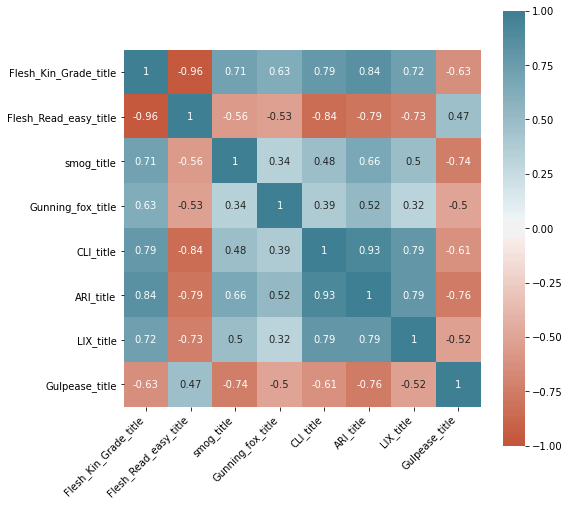

In [83]:
title_index = final_df2[['Flesh_Kin_Grade_title', 'Flesh_Read_easy_title', 'smog_title', 'Gunning_fox_title', 'CLI_title', 'ARI_title', 'LIX_title', 'Gulpease_title']]
corr_title = title_index.corr()

plt.figure(figsize =(8,8))
ax = sns.heatmap(
    corr_title, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200), annot= True,
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

title_index.corr()

In [84]:
# Only one index is strongly correlated with Flesh_Kin_Grade: Flesh_Read_easy_title
# For title, I will keep Flesh_Kin_Grade, smog, Gunning_fox, CLI, ARI, LIX_title and Gulpease.
# dropping Flesh_Read_easy_title
final_df2.drop(columns =['Flesh_Read_easy_title'], inplace = True)

## In the text 

,Flesh_Kin_Grade_text,Flesh_Read_easy_text,smog_text,Gunning_fox_text,CLI_text,ARI_text,LIX_text,Gulpease_text
Flesh_Kin_Grade_text,1.000000,-0.940271,0.972479,0.960077,0.740009,0.987268,0.958337,-0.763573
Flesh_Read_easy_text,-0.940271,1.000000,-0.907882,-0.840152,-0.879980,-0.903873,-0.931370,0.746379
smog_text,0.972479,-0.907882,1.000000,0.911393,0.741408,0.964835,0.942773,-0.812819
Gunning_fox_text,0.960077,-0.840152,0.911393,1.000000,0.604585,0.958556,0.892213,-0.713912
CLI_text,0.740009,-0.879980,0.741408,0.604585,1.000000,0.739064,0.812039,-0.789801
ARI_text,0.987268,-0.903873,0.964835,0.958556,0.739064,1.000000,0.961439,-0.765284
LIX_text,0.958337,-0.931370,0.942773,0.892213,0.812039,0.961439,1.000000,-0.768926
Gulpease_text,-0.763573,0.746379,-0.812819,-0.713912,-0.789801,-0.765284,-0.768926,1.000000


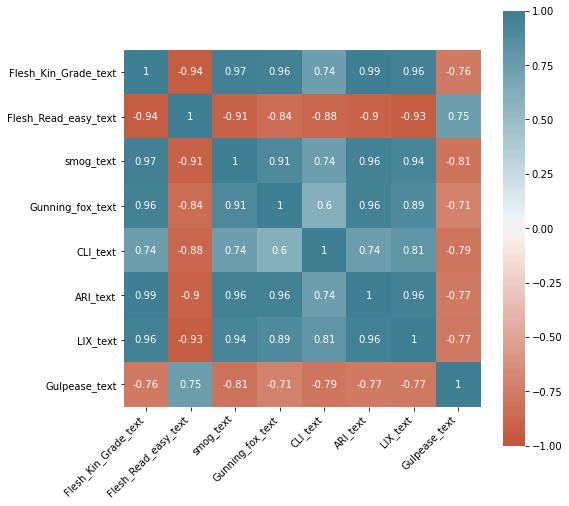

In [85]:
text_index = final_df2[['Flesh_Kin_Grade_text', 'Flesh_Read_easy_text', 'smog_text', 'Gunning_fox_text', 'CLI_text', 'ARI_text', 'LIX_text', 'Gulpease_text']]
corr_text = text_index.corr()

plt.figure(figsize =(8,8))
ax = sns.heatmap(
    corr_text, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200), annot = True,
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

text_index.corr()

In [86]:
# For text: I will keep Flesh_Kin_Grade, Flesh_Read_easy,CLI and Gulpease indexes
# dropping smog_text, Gunning_fox_text, ARI_text, LIX_text

final_df2.drop(columns =['smog_text', 'Gunning_fox_text', 'ARI_text', 'LIX_text'], inplace = True)

## Checking how  basic text features (number of words, characters, syllables, etc.) relate to each other

In [87]:
# Extrapolating number of (complex)words, characters, (poly)syllables number, 
word_syll_df_title = final_df2[['char_title', 'sent_title', 'Count_words_title',  'syllables_title',  'Poly_syllables_title', 'Complex_words_title',  'Long_words_title']]
word_syll_df_text = final_df2[[ 'char_text', 'sent_text', 'Count_words_text',  'syllables_text',  'Poly_syllables_text',  'Complex_words_text', 'Long_words_text' ]]

### For the title

,char_title,sent_title,Count_words_title,syllables_title,Poly_syllables_title,Complex_words_title,Long_words_title
char_title,1.000000,0.230552,0.900317,0.958419,0.751598,0.196264,0.594846
sent_title,0.230552,1.000000,0.250319,0.224117,0.151122,-0.007842,0.090693
Count_words_title,0.900317,0.250319,1.000000,0.862276,0.535183,-0.003421,0.290967
syllables_title,0.958419,0.224117,0.862276,1.000000,0.815554,0.301117,0.602769
Poly_syllables_title,0.751598,0.151122,0.535183,0.815554,1.000000,0.173413,0.681040
Complex_words_title,0.196264,-0.007842,-0.003421,0.301117,0.173413,1.000000,0.314314
Long_words_title,0.594846,0.090693,0.290967,0.602769,0.681040,0.314314,1.000000


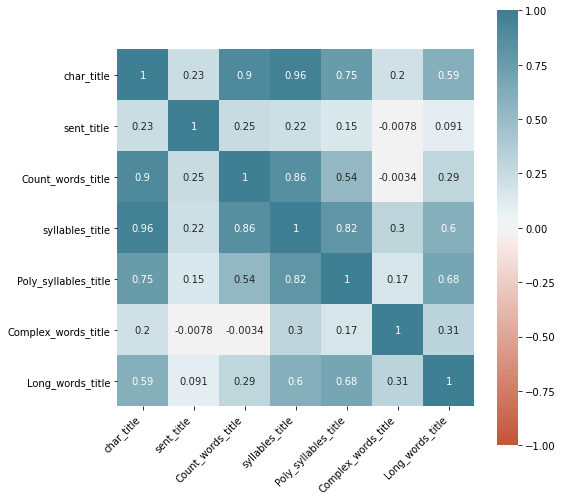

In [88]:
plt.figure(figsize =(8,8))
corr_title_word = word_syll_df_title.corr()
ax = sns.heatmap(
    corr_title_word, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True , annot = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

corr_title_word

In [89]:
# For the title, I decide to keep:char_title, sent_title, Count_words, Poly_syllables_title, Complex_words_title, Long_words_title
final_df2.drop(['syllables_title'], axis =1, inplace = True)

### For the text

,char_text,sent_text,Count_words_text,syllables_text,Poly_syllables_text,Complex_words_text,Long_words_text
char_text,1.000000,0.909642,0.996004,0.999502,0.991833,0.910300,0.982678
sent_text,0.909642,1.000000,0.927510,0.907084,0.874100,0.771294,0.853164
Count_words_text,0.996004,0.927510,1.000000,0.995088,0.979207,0.882865,0.964259
syllables_text,0.999502,0.907084,0.995088,1.000000,0.993162,0.915807,0.983439
Poly_syllables_text,0.991833,0.874100,0.979207,0.993162,1.000000,0.920998,0.992024
Complex_words_text,0.910300,0.771294,0.882865,0.915807,0.920998,1.000000,0.934876
Long_words_text,0.982678,0.853164,0.964259,0.983439,0.992024,0.934876,1.000000


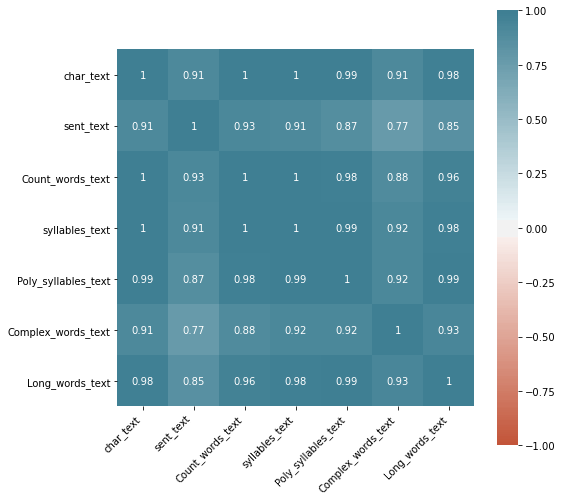

In [90]:
corr_text_word = word_syll_df_text.corr()
plt.figure(figsize =(8,8))
ax = sns.heatmap(
    corr_text_word, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

corr_text_word

In [91]:
#For the text, I decide to keep:  char_text, sent_text, Complex_words_text
final_df2.drop(['Count_words_text', 'syllables_text', 'Poly_syllables_text', 'Long_words_text'], axis =1, inplace = True)

In [92]:
final_df2.head(2)

,text,title,Real_Fake,Cat_Government News,Cat_Middle-east,Cat_News,Cat_US_News,Cat_left-news,Cat_politics,Cat_politicsNews,Cat_worldnews,sent_title,sent_text,words_in_title,char_title,words_in_text,char_text,Count_words_title,Poly_syllables_title,Complex_words_title,Complex_words_text,Long_words_title,Flesh_Kin_Grade_title,smog_title,Gunning_fox_title,CLI_title,ARI_title,LIX_title,Gulpease_title,Flesh_Kin_Grade_text,Flesh_Read_easy_text,CLI_text,Gulpease_text,title_nlp,text_nlp,title_nlp_stem,text_nlp_stem,title_nlp_lem,text_nlp_lem
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-03-31,the irony here is not lost on us. hillary is ...,hillary rodham nixon: a candidate with more b...,1,0,0,0,0,1,1,0,0,1,17,hillary rodham nixon a candidate with more ba...,64,the irony here is not lost on us hillary is b...,1626,12,7,0,21,5,11.706667,15.226696,4.8,-15.511067,9.6900,53.666667,60.666667,11.555195,45.639607,-15.516060,54.015674,"[hillary, rodham, nixon, candidate, baggage, s...","[irony, lost, us, hillary, compared, president...","[hillari, rodham, nixon, candid, baggag, samso...","[ironi, lost, us, hillari, compar, presid, wan...","[hillary, rodham, nixon, candidate, baggage, s...","[irony, lose, us, hillary, compare, president,..."
2015-03-31,"in case you missed it sen. harry reid (r-nv),...",watch dirty harry reid on his lie about romne...,1,0,0,0,0,1,1,0,0,1,8,watch dirty harry reid on his lie about romne...,60,in case you missed it sen harry reid nv who a...,500,16,4,0,3,0,5.400000,11.573499,6.4,-15.598000,4.2325,16.000000,70.250000,5.736189,81.098873,-15.578426,67.688525,"[watch, dirty, harry, reid, lie, romney, taxes...","[case, missed, sen, harry, reid, nv, announced...","[watch, dirti, harri, reid, lie, romney, tax, ...","[case, miss, sen, harri, reid, nv, announc, la...","[watch, dirty, harry, reid, lie, romney, tax, ...","[case, miss, sen, harry, reid, nv, announce, l..."


In [93]:
# Some indexes had NaN as value. This was caused by the fact that some texts just had link tokens, 
# which are not included in the calculation of sillables, words. Dividing by 0 gives you NaN.
final_df2.dropna(inplace = True)
# Save the final df
final_df2.to_csv('C:\\Users\\gianl\\Capstone2\\data\Real_fake_news_DWed.csv')